<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

C:\Users\SystemDynamicsLab\AppData\Local\Temp\ipykernel_8468\1813840303.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)


,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


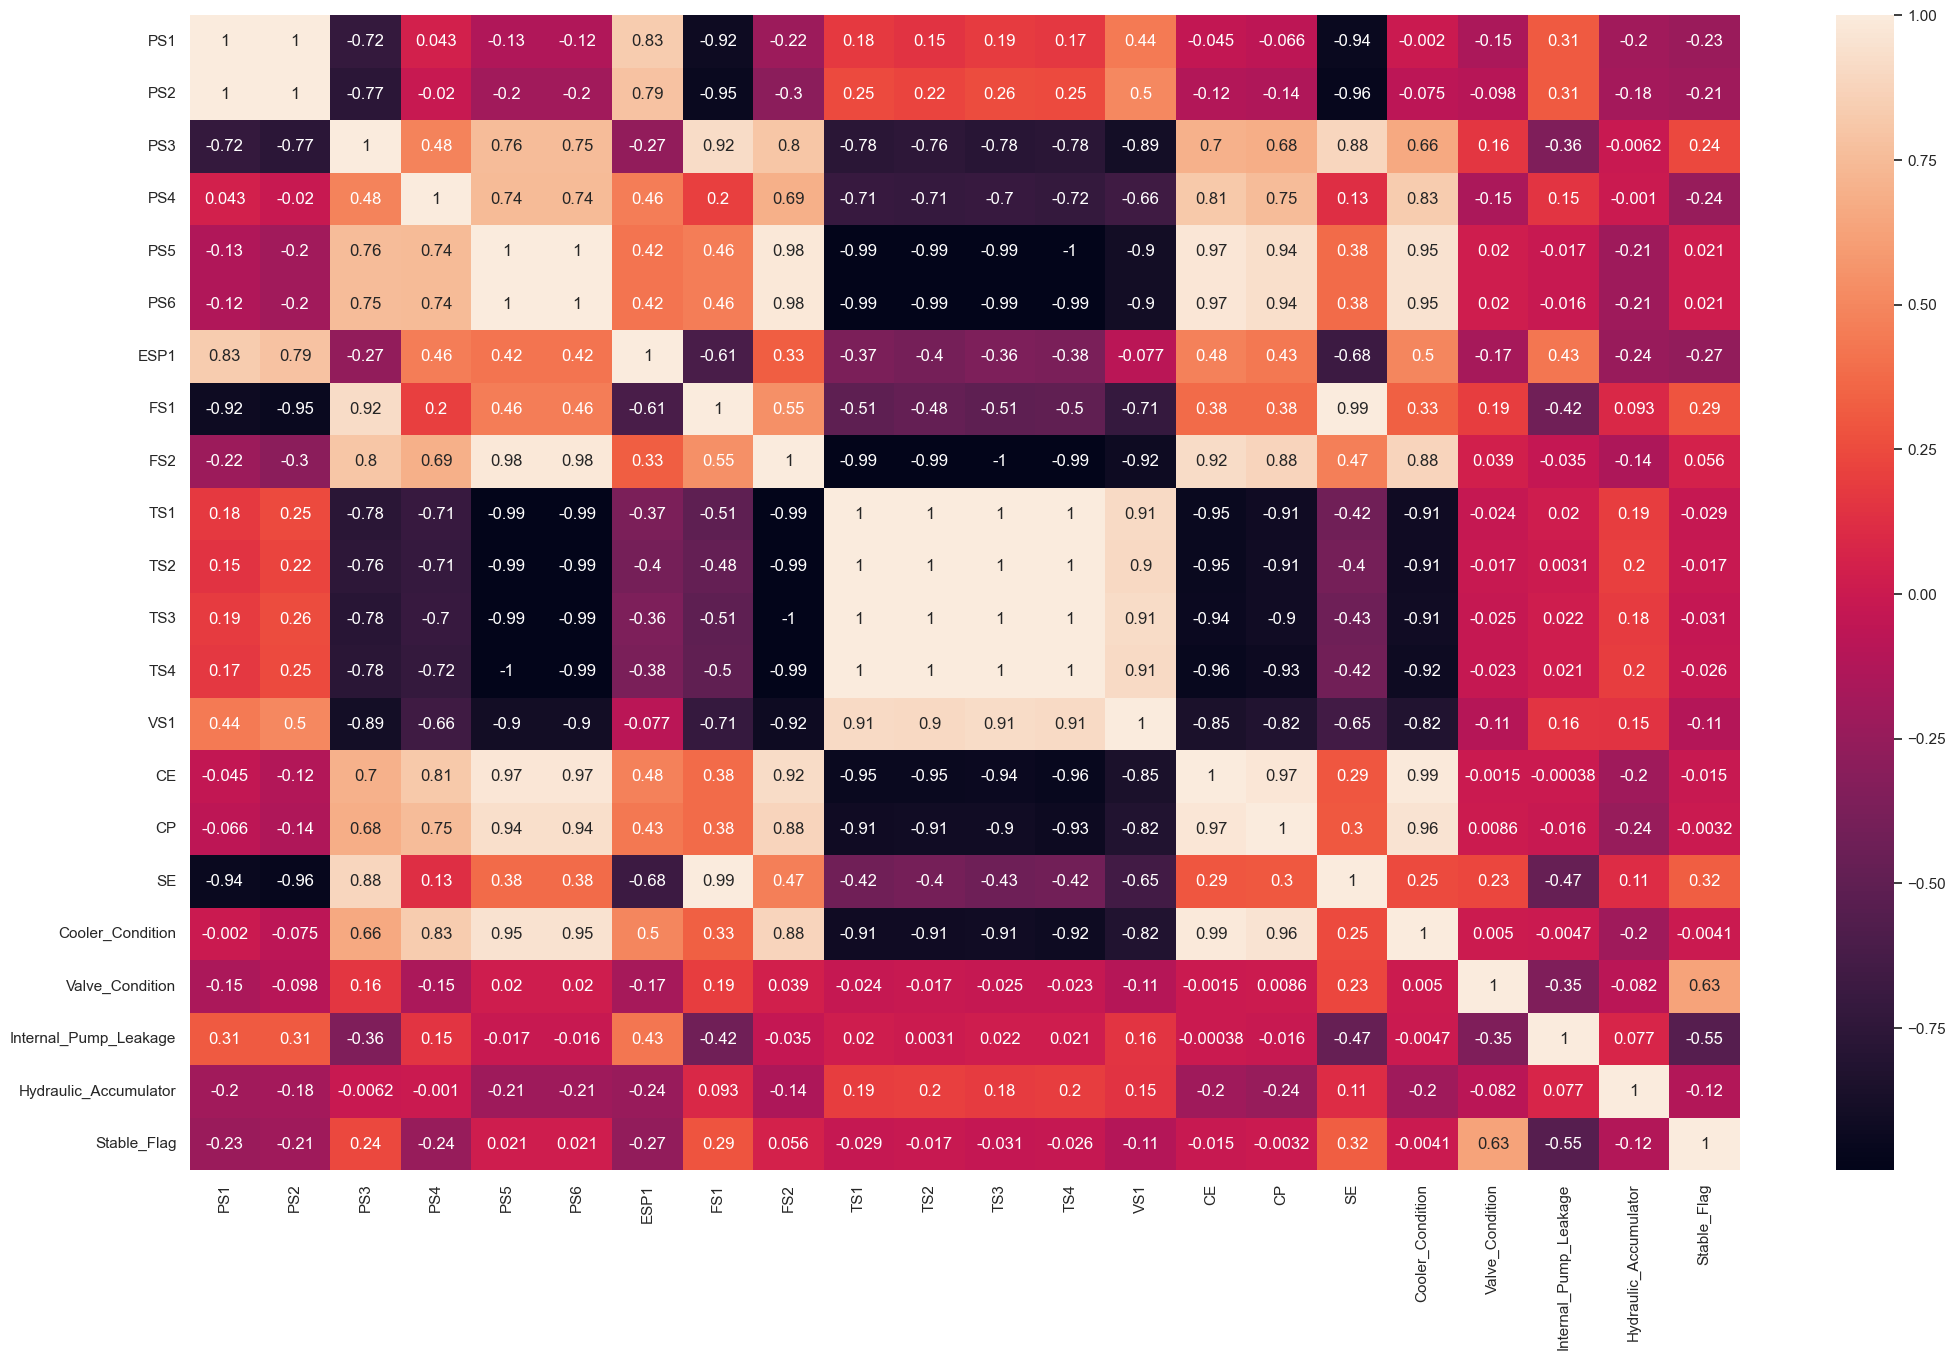

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

# 1- Data Preperation

ps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS1.txt")

ps1

ps1.shape

np.isnan(ps1).sum()

ps2=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS2.txt")

ps3=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS3.txt")

ps4=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS4.txt")

ps5=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS5.txt")

ps6=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS6.txt")

ps2

ps1_arr=ps1.mean(axis=1)
ps1_arr

ps2_arr=ps2.mean(axis=1)
ps2_arr

ps3_arr=ps3.mean(axis=1)
ps3_arr

ps4_arr=ps4.mean(axis=1)
ps4_arr

ps5_arr=ps5.mean(axis=1)
ps5_arr

ps6_arr=ps6.mean(axis=1)
ps6_arr

df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

df.head()

eps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/EPS1.txt")

esp1_arr=eps1.mean(axis=1)
esp1_arr

df["ESP1"]=esp1_arr

df.head()

a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

fs1_arr=fs1.mean(axis=1)
fs1_arr

fs2_arr=fs2.mean(axis=1)
fs2_arr

df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

df.head()

a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

ts1_arr=ts1.mean(axis=1)
ts1_arr

ts2_arr=ts2.mean(axis=1)
ts2_arr

ts3_arr=ts3.mean(axis=1)
ts3_arr

ts4_arr=ts4.mean(axis=1)
ts4_arr

df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

df.head()

vs1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/VS1.txt")

vs1

vs1_arr=vs1.mean(axis=1)
vs1_arr

df["VS1"]=vs1_arr

df.head()

a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(C)
ce,cp=a

ce_arr=ce.mean(axis=1)
ce_arr

cp_arr=cp.mean(axis=1)
cp_arr

df["CE"]=ce_arr
df["CP"]=cp_arr

df.head()

se=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/SE.txt")

se_arr=se.mean(axis=1)
se_arr

df["SE"]=se_arr

df.head()

target=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/profile.txt")

target

target.shape

df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

df_final=pd.concat([df,df_temp],axis=1)

df_final.head(20)



df_final.info()

df_final.describe()

# 2- Data Analysis

df_final.var()

df_final.corr()

fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

# fig.savefig("corr.png")

df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

df_final_corr_target

# 3- Data Preprocessing

x=df_final.iloc[:,:-5]

x.head(2)

y=df_final.iloc[:,-5:]

y.head(2)

target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

target_1

x.head()

## data splitting target-1

### target incidence



# # Increase the epochs to 100
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# # Plot training & validation accuracy values
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper left')

# plt.show()


In [75]:
round((target_1.value_counts(normalize=True)),4)    #cooler condition is normal

x2 = df.iloc[:, [2,3,6]]

x2

X_train,X_test,y_train,y_test=train_test_split(x2,target_1,test_size=0.2,random_state=1)






In [76]:
target_1

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
        ...  
2200    100.0
2201    100.0
2202    100.0
2203    100.0
2204    100.0
Name: Cooler_Condition, Length: 2205, dtype: float64

In [77]:
x2

,PS3,PS4,ESP1
0,1.991475,0.000000,2538.929167
1,1.976234,0.000000,2531.498900
2,1.972224,0.000000,2519.928000
3,1.946576,0.000000,2511.541633
4,1.922707,0.000000,2503.449500
...,...,...,...
2200,2.001438,10.202473,2543.911033
2201,1.998781,10.197919,2543.411333
2202,1.993436,10.196824,2542.729767
2203,2.007077,10.198588,2544.046333


In [78]:
y_train = y_train.replace({3: 0, 20: 1, 100: 2})
y_test = y_test.replace({3: 0, 20: 1, 100: 2})

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'df'
# X is your feature matrix, y is your target column



# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {test_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/100
56/56 [==============================] - 1s 4ms/step - loss: 0.8243 - accuracy: 0.7625 - val_loss: 0.5467 - val_accuracy: 0.8639
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.9518 - val_loss: 0.1260 - val_accuracy: 0.9887
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9773 - val_loss: 0.0653 - val_accuracy: 0.9864
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9768 - val_loss: 0.0528 - val_accuracy: 0.9864
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9768 - val_loss: 0.0505 - val_accuracy: 0.9864
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9768 - val_loss: 0.0463 - val_accuracy: 0.9909
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9785 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9847 - val_loss: 0.0294 - val_accuracy: 0.9955
Epoch 60/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9841 - val_loss: 0.0287 - val_accuracy: 0.9955
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9824 - val_loss: 0.0313 - val_accuracy: 0.9955
Epoch 62/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9847 - val_loss: 0.0319 - val_accuracy: 0.9955
Epoch 63/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9847 - val_loss: 0.0296 - val_accuracy: 0.9955
Epoch 64/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9841 - val_loss: 0.0294 - val_accuracy: 0.9955
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9841 - val_loss: 0.0290 - val_accuracy: 0.9955
Epoch 

14/14 [==============================] - 0s 1ms/step


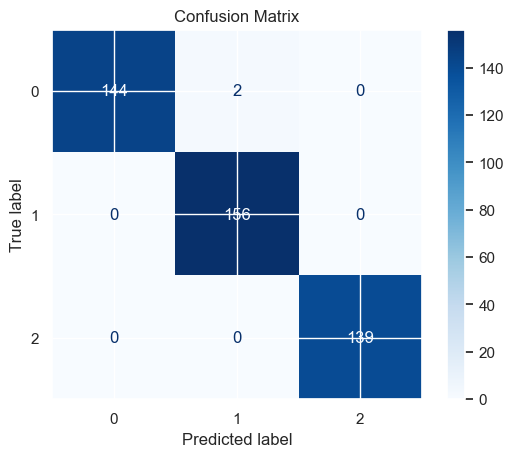

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [62]:
model.save('my_model.h5') 

C:\Users\SystemDynamicsLab\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
loaded_model = tf.keras.models.load_model('my_model.h5') 

14/14 [==============================] - 0s 514us/step


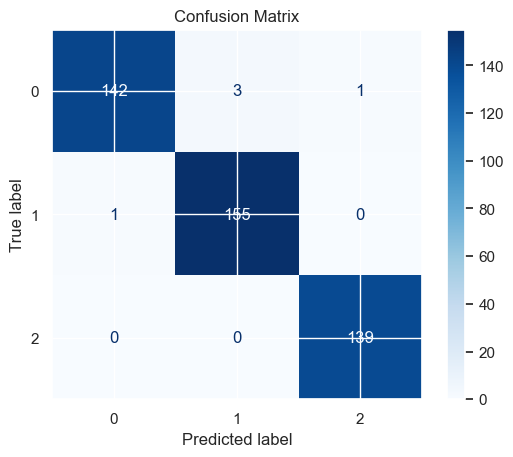

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = np.argmax(loaded_model.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [81]:
x3 = df.iloc[:, [0,1,6]]

69/69 [==============================] - 0s 952us/step


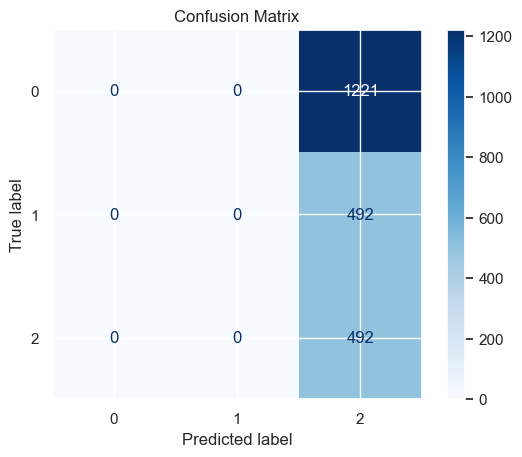

In [74]:
# Get the weights of the model
weights = loaded_model.get_weights()

# Modify the weights by dividing them by 2
new_weights = [w/1000 for w in weights]

# Set the modified weights back to the model
loaded_model.set_weights(new_weights)

# Continue with prediction and confusion matrix generation
y_pred = np.argmax(loaded_model.predict(x3), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(target_3, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


69/69 [==============================] - 0s 944us/step


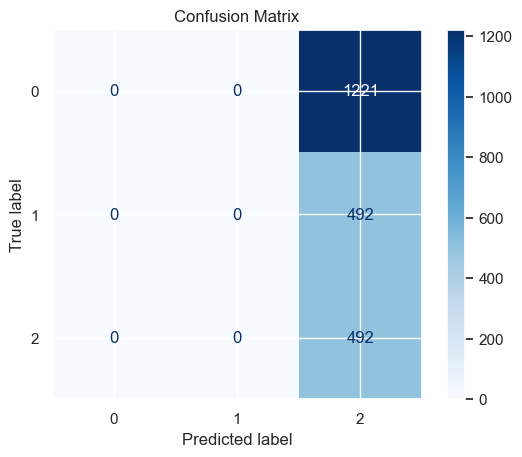

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = np.argmax(model.predict(x3), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(target_3, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()